In [6]:
import pandas as pd
from xgboost import XGBClassifier, plot_importance
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
from sklearn import preprocessing
import numpy as np
from matplotlib import pyplot

df = pd.read_csv("/mnt/c/users/gautam/source/repos/VoltInsightsAutomation/Reports/data.csv")

unused_columns = ['Crew Type Description', 'Crew Number', 'Productive Revenue per Manhour', 
                  'Billable Hours', 'Productive Revenue', 'Total Crew Cost Less Externals',
                  'Billable Hours per Resource']

for col in df.columns:
    if col not in unused_columns and (df[col].dtype != np.int64 and df[col].dtype != np.float64):
            df[col] = df[col].fillna('0')
            df[col] = df[col].str.replace('$', '')
            df[col] = df[col].str.replace('%', '')
            df[col] = df[col].str.replace('(', '')
            df[col] = df[col].str.replace(')', '')
            df[col] = df[col].astype(float)
    else:
        df.drop(col, 1, inplace=True)

def margin_range(row):
    if row['Crew Margin Less Externals per Direct Manhour'] > 35:
        val = 3 #'Greater than 35'
    elif row['Crew Margin Less Externals per Direct Manhour'] >= 10 and row['Crew Margin Less Externals per Direct Manhour'] <=35:
        val = 0 #'10 to 35'
    else:
        val = 0 #'Less than 10'
    return val

df['Crew Margin'] = df.apply(margin_range, axis=1)
df.drop('Crew Margin Less Externals per Direct Manhour', 1, inplace=True)


0.8095238095238095


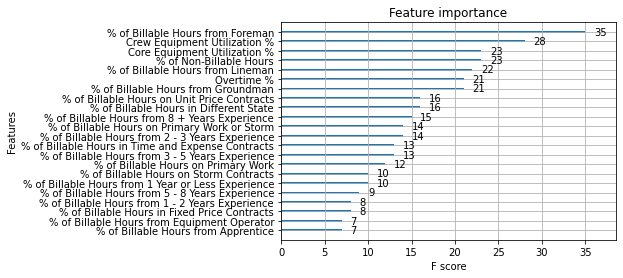

In [7]:

X = df.drop('Crew Margin', 1)
Y = df['Crew Margin']

#X = preprocessing.scale(X)

X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size=0.2)
model = XGBClassifier()
model.fit(X_train, y_train)
y_pred = model.predict(X_test)

print(accuracy_score(y_test, y_pred))
plot_importance(model)
pyplot.show()